# Определение перспективного тарифа для телеком-компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Тариф «Смарт»**


1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**


1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Примечание:**


«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.


Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Описание данных

**Таблица `users` (информация о пользователях):**


* `user_id` — уникальный идентификатор пользователя


* `first_name` — имя пользователя


* `last_name` — фамилия пользователя


* `age` — возраст пользователя (годы)


* `reg_date` — дата подключения тарифа (день, месяц, год)


* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)


* `city` — город проживания пользователя


* `tariff` — название тарифного плана

**Таблица `calls` (информация о звонках):**


* `id` — уникальный номер звонка


* `call_date` — дата звонка


* `duration` — длительность звонка в минутах


* `user_id ` — идентификатор пользователя, сделавшего звонок

**Таблица `messages` (информация о сообщениях):**


* `id` — уникальный номер сообщения


* `message_date` — дата сообщения


* `user_id ` — идентификатор пользователя, отправившего сообщение

**Таблица `internet` (информация об интернет-сессиях):**


* `id` — уникальный номер сессии


* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)


* `session_date` — дата интернет-сессии


* `user_id ` — идентификатор пользователя

**Таблица `tariffs` (информация о тарифах):**


* `tariff_name` — название тарифа


* `rub_monthly_fee` — ежемесячная абонентская плата в рублях


* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату


* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату


* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)


* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)


* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета


* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Задачи исследования

1. Изучение общей информации.


2. Подготовка данных:
 + привести данные к нужным типам;
 + изменить данные для удобства анализа.
 
 
 *Примечание:* звонки с нулевой продолжительностью - это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
 
 
3. Расчет для каждого пользователя:
 + количества сделанных звонков и израсходованных минут разговора по месяцам;
 + количества отправленных сообщений по месяцам;
 + объема израсходованного интернет-трафика по месяцам;
 + помесячной выручки с каждого пользователя (вычет бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика; умножение остатка на значение из тарифного плана; прибавление абонентской платы, соответствующую тарифному плану).
 
 
4. Анализ данных:
 + Описание поведения клиентов оператора, исходя из выборки. 
 + Построение гистограмм и описание распределения.
 
 
5. Проверка гипотез и пояснения:
 + средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
 + средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 
 
*Примечание:* пороговое значение alpha задается самостоятельно.
 
 
6. Формулирование общего вывода.

На что обращают внимание ревьюеры:
 + Как вы описываете выявленные в данных проблемы?
 + Как готовите данные к анализу?
 + Какие графики строите для распределений?
 + Как интерпретируете полученные графики?
 + Как рассчитываете стандартное отклонение и дисперсию?
 + Формулируете ли альтернативную и нулевую гипотезы?
 + Какие методы применяете для проверки гипотез?
 + Интерпретируете ли результат проверки гипотезы?
 + Соблюдаете структуру проекта и поддерживаете аккуратность кода?
 + Какие выводы делаете?
 + Оставляете ли комментарии к шагам?

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Импорт-используемых-библиотек" data-toc-modified-id="Импорт-используемых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт используемых библиотек</a></span></li><li><span><a href="#Чтение-файлов-с-данными" data-toc-modified-id="Чтение-файлов-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файлов с данными</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span></li><li><span><a href="#Изменение-данных-для-удобства-анализа" data-toc-modified-id="Изменение-данных-для-удобства-анализа-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение данных для удобства анализа</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчет-для-каждого-пользователя" data-toc-modified-id="Расчет-для-каждого-пользователя-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет для каждого пользователя</a></span><ul class="toc-item"><li><span><a href="#Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам" data-toc-modified-id="Количество-сделанных-звонков-и-израсходованных-минут-разговора-по-месяцам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Количество сделанных звонков и израсходованных минут разговора по месяцам</a></span></li><li><span><a href="#Количество-отправленных-сообщений-по-месяцам" data-toc-modified-id="Количество-отправленных-сообщений-по-месяцам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество отправленных сообщений по месяцам</a></span></li><li><span><a href="#Объем-израсходованного-интернет-трафика-по-месяцам" data-toc-modified-id="Объем-израсходованного-интернет-трафика-по-месяцам-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Объем израсходованного интернет-трафика по месяцам</a></span></li><li><span><a href="#Помесячная-выручка-с-каждого-пользователя" data-toc-modified-id="Помесячная-выручка-с-каждого-пользователя-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Помесячная выручка с каждого пользователя</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Описание-поведения-клиентов-оператора,-исходя-из-выборки" data-toc-modified-id="Описание-поведения-клиентов-оператора,-исходя-из-выборки-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Описание поведения клиентов оператора, исходя из выборки</a></span></li><li><span><a href="#Построение-гистограмм-и-описание-распределения" data-toc-modified-id="Построение-гистограмм-и-описание-распределения-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построение гистограмм и описание распределения</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Проверка-гипотез-и-пояснения" data-toc-modified-id="Проверка-гипотез-и-пояснения-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез и пояснения</a></span><ul class="toc-item"><li><span><a href="#Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Cредняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Cредняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Формулирование-общего-вывода" data-toc-modified-id="Формулирование-общего-вывода-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Формулирование общего вывода</a></span></li></ul></div>

## Изучение общей информации

### Импорт используемых библиотек

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки numpty
import numpy as np

# импорт библиотеки matpotlib
import matplotlib.pyplot as plt

# импорт библиотеки scipy
from scipy import stats as st

### Чтение файлов с данными

In [2]:
# чтение файлов с данными
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

### Изучение общей информации

**Информация о пользователях**

In [3]:
# получение первых 10 строк датасета
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
# получение общей информации о данных датасета
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
# получение описательной статистики данных датасета
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Датасет содержит информацию о 500 пользователях, 38 из которых прекратили использование тарифа. Возрастной диапазон пользователей колеблется в диапазоне от 18 до 75 лет.

Данные с датами имеют неверный формат, требуется сменить тип.

Переименуем столбец `tariff` в `tariff_name`, чтобы удобнее было сопоставлять данные о пользователях и данные о тарифах.

**Информация о звонках**

In [6]:
# получение первых 10 строк датасета
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
# получение общей информации о данных датасета
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
# получение описательной статистики данных датасета
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

В данных о звонках также следует сменить тип данных с датами.

Приведем данные о длительности к целым значениям.
Каждый звонок округляется в большую сторону: даже если он длился всего 1 секунду, будет засчитан как 1 минута. Звонки длительностью 0 минут являются пропущенными звонками.

Для дальнейших расчетов добавим столбец с данными о месяце совершения звонка.

**Информация о сообщениях**

In [9]:
# получение первых 10 строк датасета
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
# получение общей информации о данных датасета
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В данных о сообщениях также следует сменить тип данных с датами.

Для дальнейших расчетов добавим столбец с данными о месяце отправки сообщения.

**Информация об интернет-сессиях**

In [11]:
# получение первых 10 строк датасета
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [12]:
# получение общей информации о данных датасета
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
# получение описательной статистики данных датасета
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

Удалим столбец `Unnamed: 0`, так как он не несет полезной информации и является лишним.

Данные об объём потраченного за сессию интернет-трафика приводить к целым значениям не будем, так как сначала необходимо учесть общую сумму трафика за месяц, которая затем округляется в большую сторону. Добавим столбец с данными о месяце интернет-сессии.

В данных о сообщениях также следует сменить тип данных с датами.

**Информация о тарифах**

In [14]:
# получение первых строк датасета
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
# получение общей информации о данных датасета
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Для удобства переведем данные столбца `mb_per_month_included` в гигабайты и переименуем этот столбец в `gb_per_month_included`.

### Выводы

Необходимо провести следующую подготовку данных:
* в таблице с информацией о пользователях перевести столбцы `reg_date` и `churn_date` в формат даты, а столбец `tariff` переименовать в `tariff_name`, чтобы удобнее было сопоставлять данные о пользователях и данные о тарифах;


* в таблице с информацией о звонках перевести столбец `call_date` в формат даты, данные столбца `duration` привести к целым значениям путем округления в большую сторону, и добавить столбец `month`;


* в таблице с информацией о сообщениях перевести столбец `message_date` в формат даты и добавить столбец `month`;


* в таблице с информацией об интернет-сессиях перевести столбец `session_date` в формат даты, добавить столбец `month` и удалить столбец `Unnamed: 0`;


* в таблице с информацией о тарифах перевести данные столбца `mb_per_month_included` в гигабайты и переименовать этот столбец в `gb_per_month_included`.

## Подготовка данных

### Приведение данных к нужным типам

Перевод столбцов `reg_date`, `churn_date`, `call_date`, `message_date` и `session_date` в формат даты

In [16]:
# перевод в формат даты
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [17]:
# получение общей информации о данных датасета
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [18]:
# получение общей информации о данных датасета
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [19]:
# получение общей информации о данных датасета
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [20]:
# получение общей информации о данных датасета
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Перевод столбца `duration` к целым значениям путем округления в большую сторону

In [21]:
# округление до целого
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [22]:
# получение первых 10 строк датасета
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


### Изменение данных для удобства анализа

Переименование столбцов `tariff` и `mb_per_month_included` и перевод данных столбца `mb_per_month_included` в гигабайты

In [23]:
# переименование столбца
users = users.rename(columns={'tariff': 'tariff_name'})

In [24]:
# вывод названий столбцов
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff_name'],
      dtype='object')

In [25]:
# переименование столбца и пересчет в гигабайты
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')
tariffs = tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'})

In [26]:
# получение первых строк датасета
tariffs.head()

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Удаление столбца `Unnamed: 0`

In [27]:
# удаление столбца
del internet['Unnamed: 0']

In [28]:
# получение первых 10 строк датасета
internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


Добавление столбцов с данными о месяцах звонков, отправки сообщений и использования интернета

In [29]:
# добавление столбцов с месяцами
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [30]:
# получение первых строк датасета
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [31]:
# получение первых строк датасета
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
# получение первых строк датасета
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


### Выводы

Во всех таблицах данные с датами переведены в формат времени, длительность звонков округлена до целых значений.

Для удобства последующего анализа были переименованы столбцы `tariff` и `mb_per_month_included`, данные столбца `mb_per_month_included` пересчитаны в гигабайты, удален столбец `Unnamed: 0`, а также добавлены столбцы с данными о месяцах звонков, отправки сообщений и использования интернета.

## Расчет для каждого пользователя

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [33]:
# расчет количества звонков и их общей длительности за каждый месяц 
user_calls = calls.groupby(['user_id', 'month'])\
                  .agg({'id': 'count', 'duration': 'sum'})\
                  .reset_index()\
                  .rename(columns={'id': 'count_call_month', 'duration': 'duration_call_month'})

# получение первых 10 строк датасета
user_calls.head(10)

,user_id,month,count_call_month,duration_call_month
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


In [34]:
# получение общей информации о данных датасета
user_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
user_id                3174 non-null int64
month                  3174 non-null int64
count_call_month       3174 non-null int64
duration_call_month    3174 non-null int64
dtypes: int64(4)
memory usage: 99.3 KB


### Количество отправленных сообщений по месяцам

In [35]:
# расчет количества отправленных сообщений за каждый месяц
user_messages = messages.groupby(['user_id', 'month'])\
                  .agg({'id': 'count'})\
                  .reset_index()\
                  .rename(columns={'id': 'count_message_month'})

# получение первых 10 строк датасета
user_messages.head(10)

,user_id,month,count_message_month
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [36]:
# получение общей информации о данных датасета
user_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id                2717 non-null int64
month                  2717 non-null int64
count_message_month    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


### Объем израсходованного интернет-трафика по месяцам

In [37]:
# расчет израсходованного интернет-трафика за каждый месяц
user_internet = internet.groupby(['user_id', 'month'])\
                  .agg({'mb_used': 'sum'})\
                  .reset_index()\
                  .rename(columns={'mb_used': 'mb_used_session_month'})

# получение первых 10 строк датасета
user_internet.head(10)

,user_id,month,mb_used_session_month
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


Общая сумма интернет-трафика за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Поэтому мегабайты переведем в гигабайты и округлим в большую сторону

In [38]:
# переименование столбца и пересчет в гигабайты и округление до большего
user_internet['mb_used_session_month'] = (user_internet['mb_used_session_month'] / 1024).apply(np.ceil).astype('int')
user_internet = user_internet.rename(columns={'mb_used_session_month': 'gb_used_session_month'})

# получение первых 10 строк датасета
user_internet.head(10)

,user_id,month,gb_used_session_month
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
5,1000,10,15
6,1000,11,15
7,1000,12,10
8,1001,11,18
9,1001,12,14


In [39]:
# получение общей информации о данных датасета
user_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id                  3203 non-null int64
month                    3203 non-null int64
gb_used_session_month    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


### Помесячная выручка с каждого пользователя

Помесячная выручка с каждого пользователя вычисляется путем вычета бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика. Затем остаток умножается на значение из тарифного плана с последующим прибавлением абонентской платы, соответствующей тарифному плану

Получим датасет с данными о звонках, сообщениях и интернет-трафику для каждого пользователя

In [40]:
# слияние датасетов
user_use = user_calls.merge(user_messages, on = ['user_id', 'month'], how = 'outer')
user_use = user_use.merge(user_internet, on = ['user_id', 'month'], how = 'outer')

In [41]:
# получение первых 10 строк датасета
user_use.head(10)

,user_id,month,count_call_month,duration_call_month,count_message_month,gb_used_session_month
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
5,1000,10,57.0,350.0,73.0,15.0
6,1000,11,43.0,338.0,58.0,15.0
7,1000,12,46.0,333.0,70.0,10.0
8,1001,11,59.0,430.0,NaN,18.0
9,1001,12,63.0,414.0,NaN,14.0


Получим датасет с данными о пользователях, месте их обитания и их тарифах

In [42]:
# получение датасета
user_tariff = users[['user_id', 'city', 'tariff_name']]

# получение первых 10 строк датасета
user_tariff.head(10)

,user_id,city,tariff_name
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
5,1005,Набережные Челны,smart
6,1006,Ульяновск,smart
7,1007,Москва,smart
8,1008,Челябинск,smart
9,1009,Пермь,smart


Объединим полученные датасеты и информацию о тарифах в один датасет

In [43]:
# слияние датасетов
data = user_use.merge(user_tariff, on = 'user_id', how = 'outer')
data = data.merge(tariffs, on = 'tariff_name', how = 'outer')

In [44]:
# получение первых 10 строк датасета
data.head(10)

,user_id,month,count_call_month,duration_call_month,count_message_month,gb_used_session_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
5,1000,10.0,57.0,350.0,73.0,15.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
6,1000,11.0,43.0,338.0,58.0,15.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
7,1000,12.0,46.0,333.0,70.0,10.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
8,1003,8.0,55.0,380.0,37.0,9.0,Москва,ultra,1000,30,3000,1950,150,1,1
9,1003,9.0,134.0,961.0,91.0,13.0,Москва,ultra,1000,30,3000,1950,150,1,1


In [45]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
count_call_month         3174 non-null float64
duration_call_month      3174 non-null float64
count_message_month      2717 non-null float64
gb_used_session_month    3203 non-null float64
city                     3216 non-null object
tariff_name              3216 non-null object
messages_included        3216 non-null int64
gb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 402.0+ KB


In [46]:
# определение пропущенных значений
data.isna().sum()

user_id                    0
month                      2
count_call_month          42
duration_call_month       42
count_message_month      499
gb_used_session_month     13
city                       0
tariff_name                0
messages_included          0
gb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Датасет содержит 2 пропущенных значения в месяце. Проверим

In [47]:
# вывод строк с пропусками в месяце
data[data['month'].isnull()]

,user_id,month,count_call_month,duration_call_month,count_message_month,gb_used_session_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,Волжский,ultra,1000,30,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,Омск,smart,50,15,500,550,200,3,3


В наших данных нашлись два пользователя, которые имеют тарифы, но не пользуются ими. Удалим их из анализа.

In [48]:
# удаление строк с пропусками в месяце
data.dropna(subset = ['month'], inplace = True)

Теперь, заменим пропущенные значения в звонках, сообщениях и гигабайтах на нули, так как пользователи просто не используют их в данном месяце.

In [49]:
# замена пропущенных значений
data = data.fillna({'count_call_month': 0,
                    'duration_call_month': 0,
                    'count_message_month': 0,
                    'gb_used_session_month': 0    
})

In [50]:
# определение пропущенных значений
data.isna().sum()

user_id                  0
month                    0
count_call_month         0
duration_call_month      0
count_message_month      0
gb_used_session_month    0
city                     0
tariff_name              0
messages_included        0
gb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Некоторые целые типы данных превратились в вещественные. Изменим их тип на целочисленный

In [51]:
# замена типа данных
data = data.astype({'month': "int64", 
                    'count_call_month': "int64",
                    'duration_call_month': "int64",
                    'count_message_month': "int64", 
                    'gb_used_session_month': "int64"
                   })

In [52]:
# получение рандомных 10 строк датасета
data.sample(10)

,user_id,month,count_call_month,duration_call_month,count_message_month,gb_used_session_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
779,1402,8,90,671,36,31,Пенза,ultra,1000,30,3000,1950,150,1,1
1876,1189,3,105,717,23,22,Санкт-Петербург,smart,50,15,500,550,200,3,3
2938,1435,9,51,403,0,23,Москва,smart,50,15,500,550,200,3,3
2926,1433,9,88,712,105,16,Подольск,smart,50,15,500,550,200,3,3
511,1300,12,97,623,183,35,Москва,ultra,1000,30,3000,1950,150,1,1
2384,1307,8,97,726,30,14,Самара,smart,50,15,500,550,200,3,3
2573,1357,9,42,342,48,15,Томск,smart,50,15,500,550,200,3,3
3076,1472,10,76,468,84,23,Ярославль,smart,50,15,500,550,200,3,3
3002,1454,12,67,514,25,13,Томск,smart,50,15,500,550,200,3,3
2298,1286,11,9,47,12,5,Москва,smart,50,15,500,550,200,3,3


In [53]:
# проверка дупликатов
data.duplicated().sum()

0

Рассчитаем помесячную выручку с каждого пользователя

In [54]:
# функция для расчет затрат на превышение лимитов тарифа
def above_tariff(row):
    minute = (row['duration_call_month'] - row['minutes_included']) * row['rub_per_minute']
    sms = (row['count_message_month'] - row['messages_included']) * row['rub_per_message']
    gb = (row['gb_used_session_month'] - row['gb_per_month_included']) * row['rub_per_gb']
    total = 0
    for i in [minute, sms, gb]:
        if i > 0:
            total += i
    return total

In [55]:
# применение функции и добавление столбца
data['above_tariff'] = data.apply(lambda x: above_tariff(x), axis=1)

# расчет общих затрат
data['revenue'] = data['above_tariff'] + data['rub_monthly_fee']

In [56]:
# получение рандомных 10 строк датасета
data.sample(10)

,user_id,month,count_call_month,duration_call_month,count_message_month,gb_used_session_month,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_tariff,revenue
1338,1072,4,76,554,24,25,Уфа,smart,50,15,500,550,200,3,3,2162,2712
388,1240,12,63,431,0,43,Воронеж,ultra,1000,30,3000,1950,150,1,1,1950,3900
1579,1130,12,90,580,55,19,Тюмень,smart,50,15,500,550,200,3,3,1055,1605
771,1397,12,33,232,0,23,Воронеж,ultra,1000,30,3000,1950,150,1,1,0,1950
2797,1410,12,51,402,20,15,Нижний Тагил,smart,50,15,500,550,200,3,3,0,550
2674,1383,12,41,285,9,10,Ульяновск,smart,50,15,500,550,200,3,3,0,550
707,1380,11,94,597,27,32,Ростов-на-Дону,ultra,1000,30,3000,1950,150,1,1,300,2250
1538,1119,12,32,194,47,19,Петрозаводск,smart,50,15,500,550,200,3,3,800,1350
1990,1217,2,11,72,6,4,Ульяновск,smart,50,15,500,550,200,3,3,0,550
1780,1174,3,88,645,38,21,Санкт-Петербург,smart,50,15,500,550,200,3,3,1635,2185


### Выводы

Для каждого пользователя были рассчитаны по месяцам количество сделанных звонков, израсходованных минут разговора, отправленных сообщений, объем израсходованного интернет-трафика, а также общие затраты пользователя на все это. Полученные данные сведены в единый датасет.

## Анализ данных

### Описание поведения клиентов оператора, исходя из выборки

Разделим общий датасет на два, согласна используемому тарифу

In [57]:
# создание датасетов по тарифам
smart = data[data['tariff_name'] == 'smart']
ultra = data[data['tariff_name'] == 'ultra']

In [58]:
# получение описательной статистики данных датасета
smart[['duration_call_month', 'count_message_month',
       'gb_used_session_month', 'revenue'
      ]].describe()

,duration_call_month,count_message_month,gb_used_session_month,revenue
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16.328847,1289.973531
std,190.313730,28.227876,5.747061,818.404367
min,0.000000,0.000000,0.000000,550.000000
25%,282.000000,10.000000,13.000000,550.000000
50%,422.000000,28.000000,17.000000,1023.000000
75%,545.000000,51.000000,20.000000,1750.000000
max,1435.000000,143.000000,38.000000,6770.000000


In [59]:
# получение описательной статистики данных датасета
ultra[['duration_call_month', 'count_message_month',
       'gb_used_session_month', 'revenue'
      ]].describe()

,duration_call_month,count_message_month,gb_used_session_month,revenue
count,985.000000,985.000000,985.000000,985.000000
mean,526.623350,49.363452,19.494416,2070.152284
std,317.606098,47.804457,9.853511,376.187114
min,0.000000,0.000000,0.000000,1950.000000
25%,284.000000,6.000000,12.000000,1950.000000
50%,518.000000,38.000000,19.000000,1950.000000
75%,752.000000,79.000000,27.000000,1950.000000
max,1673.000000,224.000000,49.000000,4800.000000


In [60]:
print('Тариф "Смарт" в среднем за месяц:')
print('')
duration_mean_smart = smart['duration_call_month'].describe()['mean']
print(f'Минут разговора: {duration_mean_smart:.2f}')

message_mean_smart = smart['count_message_month'].describe()['mean']
print(f'Сообщений: {message_mean_smart:.2f}')

gb_mean_smart = smart['gb_used_session_month'].describe()['mean']
print(f'Гигабайт интернета: {gb_mean_smart:.2f}')

revenue_mean_smart = smart['revenue'].describe()['mean']
print(f'Итого затрат в руб.: {revenue_mean_smart:.2f}')
print('')


print('Тариф "Смарт" дисперсия:')
print('')

duration_var_smart = np.var(smart['duration_call_month'])
print(f'Минут разговора: {duration_var_smart:.2f}')

message_var_smart = np.var(smart['count_message_month'])
print(f'Сообщений: {message_var_smart:.2f}')

gb_var_smart = np.var(smart['gb_used_session_month'])
print(f'Гигабайт интернета: {gb_var_smart:.2f}')

revenue_var_smart = np.var(smart['revenue'])
print(f'Затрат: {revenue_var_smart:.2f}')
print('')


print('Тариф "Смарт" стандартное отклонение:')
print('')
duration_std_smart = smart['duration_call_month'].describe()['std']
print(f'Минут разговора: {duration_std_smart:.2f}')

message_std_smart = smart['count_message_month'].describe()['std']
print(f'Сообщений: {message_std_smart:.2f}')

gb_std_smart = smart['gb_used_session_month'].describe()['std']
print(f'Гигабайт интернета: {gb_std_smart:.2f}')

revenue_std_smart = smart['revenue'].describe()['std']
print(f'Затрат: {revenue_std_smart:.2f}')

Тариф "Смарт" в среднем за месяц:

Минут разговора: 417.93
Сообщений: 33.38
Гигабайт интернета: 16.33
Итого затрат в руб.: 1289.97

Тариф "Смарт" дисперсия:

Минут разговора: 36203.07
Сообщений: 796.46
Гигабайт интернета: 33.01
Затрат: 669485.22

Тариф "Смарт" стандартное отклонение:

Минут разговора: 190.31
Сообщений: 28.23
Гигабайт интернета: 5.75
Затрат: 818.40


In [61]:
print('Тариф "Ультра" в среднем за месяц:')
print('')
duration_mean_ultra = ultra['duration_call_month'].describe()['mean']
print(f'Минут разговора: {duration_mean_ultra:.2f}')

message_mean_ultra = ultra['count_message_month'].describe()['mean']
print(f'Сообщений: {message_mean_ultra:.2f}')

gb_mean_ultra = ultra['gb_used_session_month'].describe()['mean']
print(f'Гигабайт интернета: {gb_mean_ultra:.2f}')

revenue_mean_ultra = ultra['revenue'].describe()['mean']
print(f'Итого затрат в руб.: {revenue_mean_ultra:.2f}')
print('')


print('Тариф "Ультра" дисперсия:')
print('')

duration_var_ultra = np.var(ultra['duration_call_month'])
print(f'Минут разговора: {duration_var_ultra:.2f}')

message_var_ultra = np.var(ultra['count_message_month'])
print(f'Сообщений: {message_var_ultra:.2f}')

gb_var_ultra = np.var(ultra['gb_used_session_month'])
print(f'Гигабайт интернета: {gb_var_ultra:.2f}')

revenue_var_ultra = np.var(ultra['revenue'])
print(f'Затрат: {revenue_var_ultra:.2f}')
print('')


print('Тариф "Ультра" стандартное отклонение:')
print('')
duration_std_ultra = ultra['duration_call_month'].describe()['std']
print(f'Минут разговора: {duration_std_ultra:.2f}')

message_std_ultra = ultra['count_message_month'].describe()['std']
print(f'Сообщений: {message_std_ultra:.2f}')

gb_std_ultra = ultra['gb_used_session_month'].describe()['std']
print(f'Гигабайт интернета: {gb_std_ultra:.2f}')

revenue_std_ultra = ultra['revenue'].describe()['std']
print(f'Затрат: {revenue_std_ultra:.2f}')

Тариф "Ультра" в среднем за месяц:

Минут разговора: 526.62
Сообщений: 49.36
Гигабайт интернета: 19.49
Итого затрат в руб.: 2070.15

Тариф "Ультра" дисперсия:

Минут разговора: 100771.22
Сообщений: 2282.95
Гигабайт интернета: 96.99
Затрат: 141373.07

Тариф "Ультра" стандартное отклонение:

Минут разговора: 317.61
Сообщений: 47.80
Гигабайт интернета: 9.85
Затрат: 376.19


Пользователи использующие тариф "Смарт" в среднем чаще превышают лимиты и переплачивают, чем пользователи тарифа "Ультра". Однако в большинстве случаев, даже с учетом переплаты, использование тарифа "Смарт" оказывается выгоднее.

### Построение гистограмм и описание распределения

Text(0.5, 1.0, 'Длительность звонков в минутах в месяц на тарифе "Смарт"')

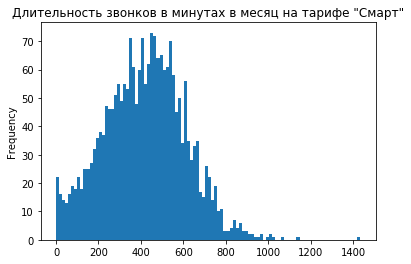

In [62]:
# построение гистограммы
smart['duration_call_month'].plot(kind='hist', bins=100)
plt.title('Длительность звонков в минутах в месяц на тарифе "Смарт"')

Text(0.5, 1.0, 'Длительность звонков в минутах в месяц на тарифе "Ультра"')

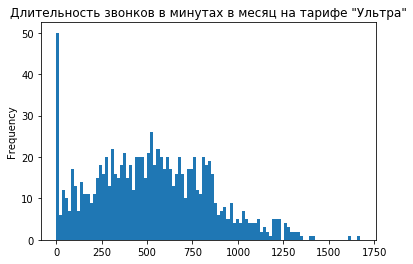

In [63]:
# построение гистограммы
ultra['duration_call_month'].plot(kind='hist', bins=100)
plt.title('Длительность звонков в минутах в месяц на тарифе "Ультра"')

Распределения носят ассиметричный характер. Пользователи тарифа "Смарт" часто выходят за пределы лимита, в то время как пользователи тарифа "Ультра" в него укладываются. Выбросы в нулях - это пропущенные звонки.

Text(0.5, 1.0, 'Количество отправленных сообщений в месяц на тарифе "Смарт"')

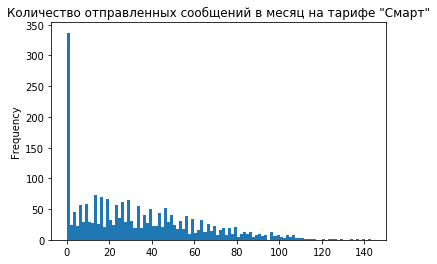

In [64]:
# построение гистограммы
smart['count_message_month'].plot(kind='hist', bins=100)
plt.title('Количество отправленных сообщений в месяц на тарифе "Смарт"')

Text(0.5, 1.0, 'Количество отправленных сообщений в месяц на тарифе "Ультра"')

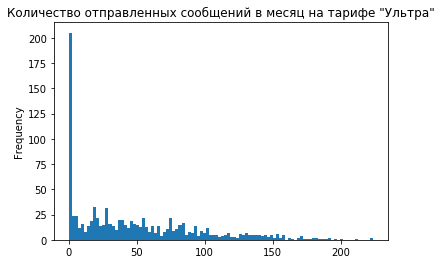

In [65]:
# построение гистограммы
ultra['count_message_month'].plot(kind='hist', bins=100)
plt.title('Количество отправленных сообщений в месяц на тарифе "Ультра"')

Это распределения Пуассона. Сообщения не пользуются популярностью, в основном ими мало пользуются вне зависимости от тарифа. И все же пользователи тарифа "Смарт" иногда выходят за пределы лимита, в то время как пользователи тарифа "Ультра" в него укладываются.

Text(0.5, 1.0, 'Количество интернет-трафика использованного в месяц на тарифе "Смарт"')

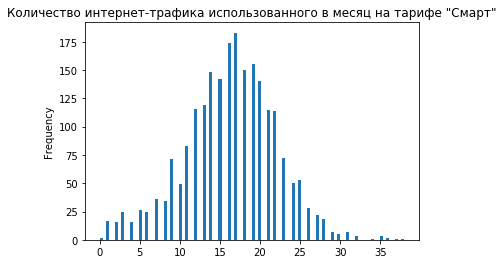

In [66]:
# построение гистограммы
smart['gb_used_session_month'].plot(kind='hist', bins=100)
plt.title('Количество интернет-трафика использованного в месяц на тарифе "Смарт"')

Text(0.5, 1.0, 'Количество интернет-трафика использованного в месяц на тарифе "Ультра"')

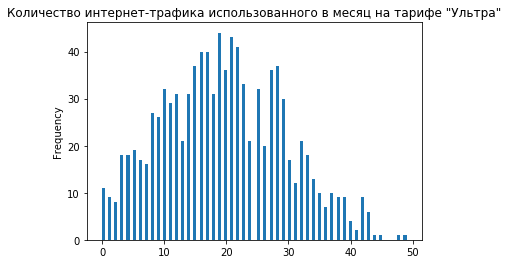

In [67]:
# построение гистограммы
ultra['gb_used_session_month'].plot(kind='hist', bins=100)
plt.title('Количество интернет-трафика использованного в месяц на тарифе "Ультра"')

Нормальные распределения. На обоих тарифах пользователи часто превышают лимит по гигабайтам, но число таких пользователей на тарифе "Смарт" гораздо больше.

Text(0.5, 1.0, 'Затраты на связь в месяц на тарифе "Смарт"')

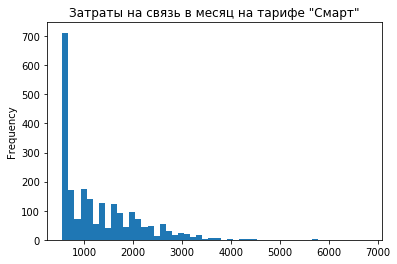

In [68]:
# построение гистограммы
smart['revenue'].plot(kind='hist', bins=50)
plt.title('Затраты на связь в месяц на тарифе "Смарт"')

Text(0.5, 1.0, 'Затраты на связь в месяц на тарифе "Ультра"')

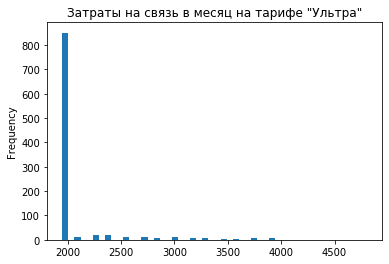

In [69]:
# построение гистограммы
ultra['revenue'].plot(kind='hist', bins=50)
plt.title('Затраты на связь в месяц на тарифе "Ультра"')

Пользователи тарифа "Смарт" часто доплачивают за превышение лимитов, в то время как пользователи тарифа "Ультра" делают это редко.

In [70]:
# вывод коэффициента корреляции Пирсона
smart[['duration_call_month', 'count_message_month',
       'gb_used_session_month', 'revenue'
      ]].corr()

,duration_call_month,count_message_month,gb_used_session_month,revenue
duration_call_month,1.000000,0.203091,0.339142,0.415948
count_message_month,0.203091,1.000000,0.145737,0.130258
gb_used_session_month,0.339142,0.145737,1.000000,0.847958
revenue,0.415948,0.130258,0.847958,1.000000


In [71]:
# вывод коэффициента корреляции Пирсона
ultra[['duration_call_month', 'count_message_month',
       'gb_used_session_month', 'revenue'
      ]].corr()

,duration_call_month,count_message_month,gb_used_session_month,revenue
duration_call_month,1.000000,0.082084,0.177111,0.090650
count_message_month,0.082084,1.000000,0.173901,0.018930
gb_used_session_month,0.177111,0.173901,1.000000,0.621388
revenue,0.090650,0.018930,0.621388,1.000000


Наибольший вклад в итоговую сумму отплаты за тариф "Ультра" вносит превышение лимита интернет-трафика, а при использовании тарифа "Смарт", заметный вклад вносит еще и превышение длительности звонков. 

### Выводы

Пользователи использующие тариф "Смарт" в среднем чаще превышают лимиты и переплачивают, чем пользователи тарифа "Ультра". 
Однако в большинстве случаев, даже с учетом переплаты, использование тарифа "Смарт" оказывается выгоднее.

Пользователи тарифа "Ультра" практически всегда укладываются по минутам разговора и сообщениям, но периодически превышают лимит по интернет-трафику, а пользователи тарифа "Смарт" часто превышают лимиты по всем категориям. 

Наибольший вклад в итоговую сумму отплаты за тариф "Ультра" вносит превышение лимита интернет-трафика, а при использовании тарифа "Смарт", заметный вклад вносит еще и превышение длительности звонков. 

## Проверка гипотез и пояснения

Напишем функцию для избавления от выбросов с помощью правила 3 сигм.

In [72]:
# функция для удаления выбросов
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Формулирование нулевой и альтернативной гипотезы**

Нулевая гипотеза:

H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается

Альтернативная гипотеза:

H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

**Критерий для проверки гипотез**

Для проверки гипотез используется t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
При этом необходимо учесть, что дисперсии выборок различаются, поэтому equal_var = False.

Критический уровень значимости - 0.05, чтобы вероятность правильности гипотезы была 95% и больше.

In [73]:
# критический уровень значимости
alpha = 0.05

In [74]:
# удаление выбросов
ultra = delete_outliers(ultra, 'revenue', 0)
ultra_revenue = ultra['revenue']

smart = delete_outliers(smart, 'revenue', 0)
smart_revenue = smart['revenue']

In [75]:
# проверка гипотез
results = st.ttest_ind(ultra_revenue, smart_revenue, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.665521e-316
Отвергаем нулевую гипотезу


Нулевой гипотезой была гипотеза о равенстве средних выручек пользователей тарифов «Ультра» и «Смарт» и очень маленькое p-value говорит о том, вероятность равенства средних выручек ничтожно мала. Нулевая гипотеза отвергается. А значит сформулированная альтернативная гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - верна.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Формулирование нулевой и альтернативной гипотезы**

Нулевая гипотеза:

H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов

Альтернативная гипотеза:

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы создадим две соответствующие таблицы moscow и other.

In [76]:
# создание датасетов по расположению
moscow = data[data['city'] == 'Москва']
other = data[data['city'] != 'Москва']

In [77]:
# вывод дисперсии
np.var(moscow['revenue'])

564710.7117467273

In [78]:
# вывод дисперсии
np.var(other['revenue'])

653886.3270894174

**Критерий для проверки гипотез**

Для проверки гипотез используется t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.
При этом необходимо учесть, что дисперсии выборок различаются, поэтому equal_var = False.

Критический уровень значимости - 0.05, чтобы вероятность правильности гипотезы была 95% и больше.

In [79]:
# критический уровень значимости
alpha = 0.05

In [80]:
# удаление выбросов
moscow = delete_outliers(moscow, 'revenue', 0)
moscow_revenue_mean = moscow['revenue']

other = delete_outliers(other, 'revenue', 0)
other_revenue_mean = other['revenue']

In [81]:
# проверка гипотез
results = st.ttest_ind(moscow_revenue_mean, other_revenue_mean, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.28193534711211565
Не получилось отвергнуть нулевую гипотезу


Нулевой гипотезой была гипотеза о равенстве средних выручек пользователей из Москвы и пользователей из других регионов. Значение p-value равное 0.28 говорит о том, что существует большая вероятность случайного характера в различии средних выручек. Нулевая гипотеза не может быть отвергнута. Значит, нашу альтернативную гипотезу о различии средних - отвергаем.

### Выводы

Гипотеза о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается - верна.

Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - отвергнута, т.к. не доказано обратное.

## Формулирование общего вывода

Пользователи разных тарифов ведут себя по-разному. Пользователи использующие тариф "Смарт" в среднем чаще превышают лимиты и переплачивают, чем пользователи тарифа "Ультра". Однако в большинстве случаев, даже с учетом переплаты, использование тарифа "Смарт" оказывается выгоднее для пользователя.

Пользователи тарифа "Ультра" практически всегда укладываются по минутам разговора и сообщениям, но периодически превышают лимит по интернет-трафику, а пользователи тарифа "Смарт" часто превышают лимиты по всем категориям. Сообщения не пользуются популярностью на обоих тарифах.

Наибольший вклад в итоговую сумму отплаты за тариф "Ультра" вносит превышение лимита интернет-трафика, а при использовании тарифа "Смарт", заметный вклад вносит еще и превышение длительности звонков.

Прибыль компании от пользователей тарифа "Ультра" больше, чем от пользователей тарифа "Смарт", потому как на тарифе "Смарт" пользователи близки к своим лимитам и часто превышают их, в то время как на тарифе "Ультра" остаются большие неизрасходованные "запасы".

Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов - отвергнута, т.к. не доказано обратное.